In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Polynomial Regression

In many regression problems the relationship between the input feature $(x)$ and the ouput value $(y)$ is **nonlinear**. 
In this Jupyter Notebook, you'll learn how to use a linear model to fit nonlinear data.

**Table of Contents**

- [A Toy Dataset](#1.-A-First-Example)
- [Adding Polynomial Features](#2.-Adding-Polynomial-Features)
- [Predicting house prices revisited](#3.-Predicting-house-prices-revisited)

## 1. A Toy Dataset

Let us generate some nonlinear data, based on the cubic equation $-10x^3+2x^2+8x$ (plus some random noise)

(-5.0, 6.0)

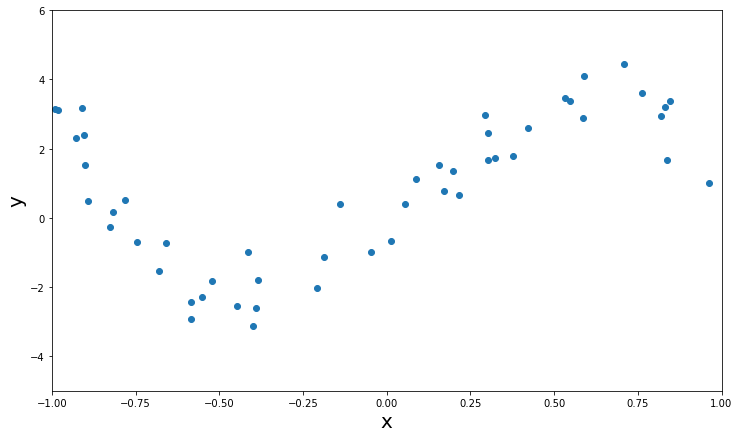

In [2]:
'generate some nonlinear data'
m=50
x = -1 + 2*np.random.rand(m)
y = -10*x**3+2*x**2+8*x + 0.75*np.random.randn(m)

plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.xlim([-1,1])
plt.ylim([-5,6])

Clearly, a straight line will never fit this data properly.

Mean Squared Error: 3.4143918555895043


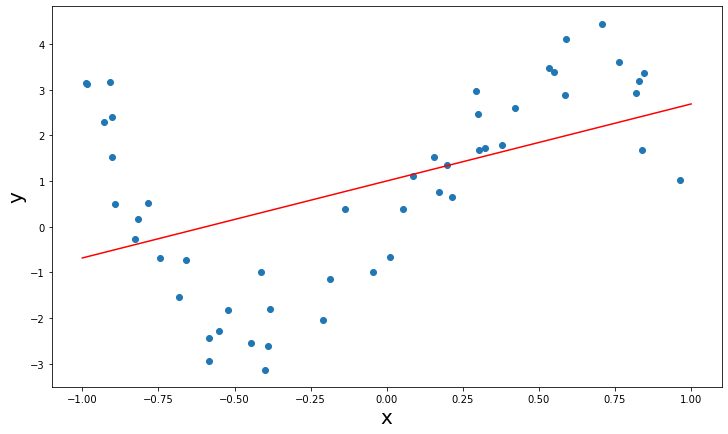

In [3]:
'build feature matrix'
m = len(x)
X = np.ones((m,2))
X[:,1] = x

'fit a line to the model'
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

'plot line'
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
X_plot = np.ones((m_plot,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r')
'Mean squared error'        
MSE = np.linalg.norm(y-X.dot(theta))**2/m

print('Mean Squared Error: '+str(MSE))

## 2.- Adding Polynomial Features

One way to fit nonlinear data is to add powers of the feature $x$ as new features.

Let us add the square and cubic powers of $x$ to our model:

$$
y = \theta_3x^3+\theta_2x^2+\theta_1 x+\theta_0
$$

The Mean Squared Error becomes

$$
\mathrm{MSE} =  \frac{1}{m}\sum_{i=1}^m\left(y_i - (\theta_3x_i^3 + \theta_2x_i^2 + \theta_1 x_i+\theta_0) \right)^2 = \frac{1}{m}\|y-X\theta\|_2^2,
$$

where feature matrix $X$, the target vector $y$ and the parameter vector $\theta$ are

$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_m & x_m^2 & x_m^3
\end{bmatrix}, \quad
y = \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_m
\end{bmatrix}, \quad \mbox{and} \quad
\theta = 
\begin{bmatrix}
\theta_0\\ \theta_1\\ \theta_2 \\ \theta_3
\end{bmatrix}.
$$

In [4]:
degree = 3
m = len(x)

'build feature matrix'
X = np.ones((m,degree+1))
for i in range(degree):
    X[:,i+1] = x**(i+1)
    
'best linear model'
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

'print model coefficients'
print('theta_0: '+str(theta[0]))
print('theta_1: '+str(theta[1]))
print('theta_2: '+str(theta[2]))
print('theta_3: '+str(theta[3]))

theta_0: -0.1586971859976973
theta_1: 7.696355748854991
theta_2: 2.6089011184003765
theta_3: -9.060790782445585


Mean Squared Error: 0.41224857080691607


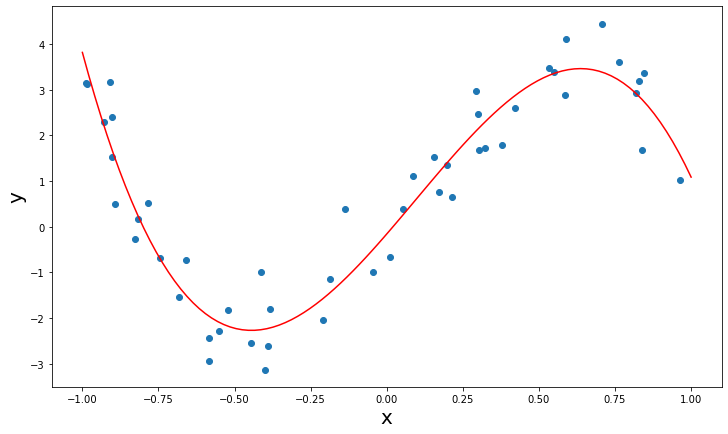

In [5]:
'plot datapoints + linear model'

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

'plot linear model'
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)        
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_plot[:,i+1] = x_plot**(i+1)
y_plot = X_plot.dot(theta) # evaluate the polynomial regression model at x_plot
plt.plot(x_plot,y_plot,'r',label='linear model')

'Mean Squared Error'
MSE = np.linalg.norm(y-X.dot(theta))**2/m
print('Mean Squared Error: '+str(MSE))

## 3. Predicting house prices revisited

### Example 1

In [103]:
# load data as a pandas dataframe
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/HousePrice.csv'
data = pd.read_csv(url)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,2600
1445,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,3615
1446,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,3492
1447,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,2156


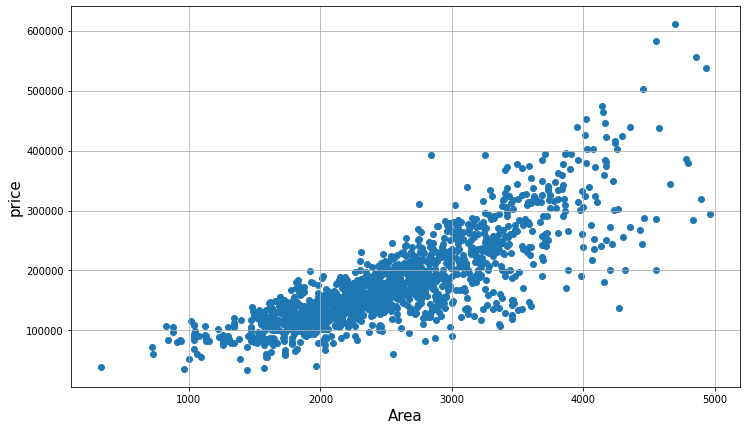

In [104]:
# figure size
plt.figure(figsize=(12,7))

# plot price as a function of toal area
plt.scatter(data['TotalArea'],data['SalePrice'])

# axis labels
plt.xlabel('Area', fontsize=15)
plt.ylabel('price', fontsize=15)

# axis grid
plt.grid(True)

Let us fit the linear model

$$
  \mbox{price} =\theta_0 + \theta_1 \cdot \mbox{area}+\theta_2\cdot\mbox{area}^2,
$$

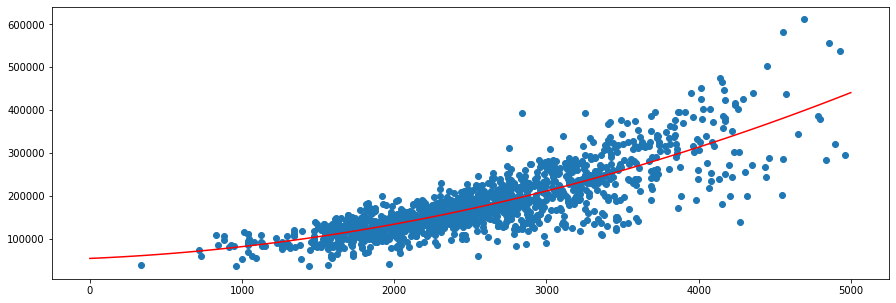

In [109]:
x = data['TotalArea'].to_numpy()
y = data['SalePrice'].to_numpy()
m = len(data)

# build feature matrix
degree=2

X = np.ones((m,degree+1))
for i in range(degree):
    X[:,i+1] = x**(i+1)

# fit linear model
theta = np.linalg.lstsq(X,y,rcond=None)[0]

# plot data points
plt.figure(figsize=(15,5))
plt.plot(x,y,'o')

# plot linear model
m_plot = 100
x_plot = np.linspace(0, 5000, m_plot) 
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_plot[:,i+1]=x_plot**(i+1)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')



In [110]:
# predictions
y_pred = X.dot(theta)

In [111]:
# mean squared error
mse = np.mean((y-y_pred)**2)
np.sqrt(mse)

41733.22588711513

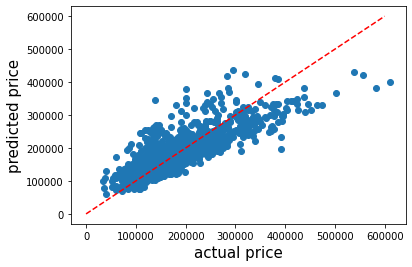

In [112]:
# plot y against y_pred
plt.scatter(y,y_pred)
plt.xlabel('actual price', fontsize=15)
plt.ylabel('predicted price', fontsize=15)

# ideal predictions y = y_pred
plt.plot([0,600000],[0,600000],'--',color='red')

### Example 2

In [15]:
X = data[['TotalArea','YearBuilt']].to_numpy()

In [17]:
# number of data points (rows), number of features (columns)
m,n = X.shape

Let us add polynomial features

In [18]:
from itertools import chain
from itertools import combinations_with_replacement as comb_w_r

In [113]:
# degree 3 polynomial features
degree = 3
combinations = comb_w_r(range(n),degree)
for combination in combinations:
    print(combination)

(0, 0, 0)
(0, 0, 1)
(0, 1, 1)
(1, 1, 1)


In [114]:
# degree 0 + degree 1 + degree 2 + degree 3 polynomial features
combinations = chain.from_iterable(comb_w_r(range(n), i) for i in range(degree+1))
for combination in combinations:
     print(combination)

()
(0,)
(1,)
(0, 0)
(0, 1)
(1, 1)
(0, 0, 0)
(0, 0, 1)
(0, 1, 1)
(1, 1, 1)


In [115]:
# number of polynomial features
combinations = chain.from_iterable(comb_w_r(range(n), i) for i in range(degree+1))
n_poly = sum(1 for combination in combinations)
n_poly

10

In [72]:
def get_polynomial_features(X,degree):
    from itertools import chain
    from itertools import combinations_with_replacement as comb_w_r
    
    # number of data points (rows), number of features (columns)
    m,n = X.shape
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n), i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations)
    
    # build feature matrix 
    Xp = np.ones((m,n_poly))
    
    combinations = chain.from_iterable(comb_w_r(range(n), i) for i in range(degree+1))
    col_index = 0 
    for comb in combinations:
        for index in comb:
            Xp[:,col_index] = Xp[:,col_index]*X[:,index]
        col_index += 1
    return Xp

In [97]:
# polynomial features matrix
X_poly = get_polynomial_features(X,degree=2)

In [98]:
# fit linear model
theta = np.linalg.lstsq(X_poly,y,rcond=None)[0]

In [99]:
theta

array([ 3.19496679e+07, -7.22140116e+02, -3.23065398e+04,  1.22694059e-02,
        3.67484271e-01,  8.18665049e+00])

Text(0.5, 0, 'price')

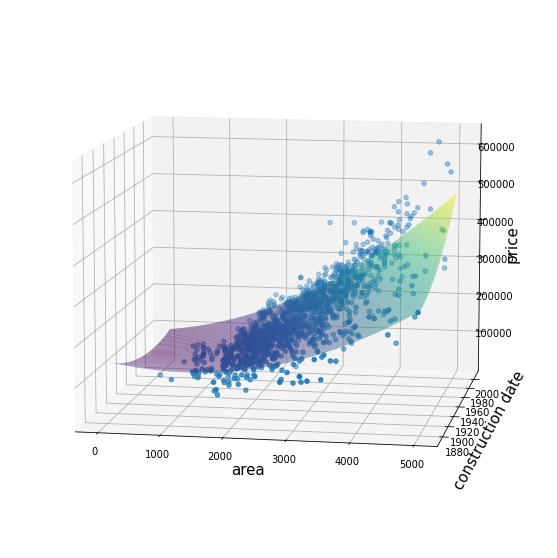

In [95]:
# EXTRA: plot fitted model + data points
fig = plt.figure(figsize=(10,10))
# 3d axes
ax = fig.add_subplot(projection='3d')


# linear model
m_plot = 100
x1_plot = np.linspace(0,5000,m_plot) # area
x2_plot = np.linspace(1880,2010,m_plot) # construction date
X1_plot,X2_plot = np.meshgrid(x1_plot,x2_plot)

X_plot = np.ones((m_plot*m_plot,2))
X_plot[:,0] = X1_plot.flatten()
X_plot[:,1] = X2_plot.flatten()
X_poly_plot = get_polynomial_features(X_plot,degree=2)
Y_plot = X_poly_plot.dot(theta).reshape((m_plot,m_plot))

ax.plot_surface(X1_plot,X2_plot,Y_plot,alpha=0.5,cmap='viridis')#,alpha=0.5,cmap='viridis',rstride=10, cstride=10)

# data points
ax.scatter(data['TotalArea'],data['YearBuilt'],data['SalePrice'])

# change view
ax.view_init(elev=10, azim=-80) 

# axis labels
ax.set_xlabel('area',fontsize=15)
ax.set_ylabel('construction date',fontsize=15)
ax.set_zlabel('price',fontsize=15)

In [100]:
y_pred = X_poly.dot(theta)

In [101]:
# mean squared error
mse = np.mean((y-y_pred)**2)
np.sqrt(mse)

34220.53536403484

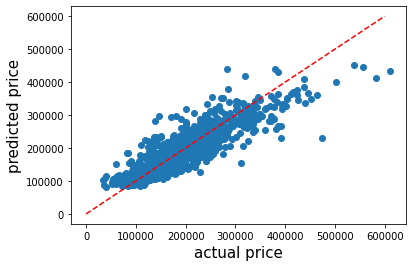

In [102]:
# plot y against y_pred
plt.scatter(y,y_pred)
plt.xlabel('actual price', fontsize=15)
plt.ylabel('predicted price', fontsize=15)

# ideal predictions y = y_pred
plt.plot([0,600000],[0,600000],'--',color='red')